# Setup dell'ambiente spark in colab

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

>>>>>>>>>>Setup ok. La SparkSession è attiva e la variabile spark è stata creata


# Import librerie

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# Caricamento e preparazione dei dati

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

--2025-08-03 18:26:31--  https://proai-datasets.s3.eu-west-3.amazonaws.com/wikipedia.csv
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 3.5.204.164, 3.5.205.228
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|3.5.204.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003477941 (957M) [text/csv]
Saving to: ‘wikipedia.csv.1’

wikipedia.csv.1     100%[===================>] 956.99M  35.6MB/s    in 27s     

2025-08-03 18:26:59 (34.8 MB/s) - ‘wikipedia.csv.1’ saved [1003477941/1003477941]

>>>>>>> File caricato in un dataframe spark

>>>>>>Colonna 'label' normalizzata
+---+---------------------------+--------------------------------------------------+--------------------------------------------------+---------+
|_c0|                      title|                                           summary|                                         documents|    label|
+---+-

# Analisi esplorativa dei dati


>>>>>>>nalisi descrittiva
Conteggio degli articoli per categoria:
+-----------+-----+
|      label|count|
+-----------+-----+
|   politics|11358|
|    culture|10372|
|    science|10236|
| humanities|10236|
|engineering|10220|
|    finance|10157|
|  transport|10130|
|  economics|10110|
| technology|10095|
|   medicine|10076|
|      trade|10068|
|     sports|10068|
|     energy|10046|
|   research|10037|
|       pets|10023|
+-----------+-----+



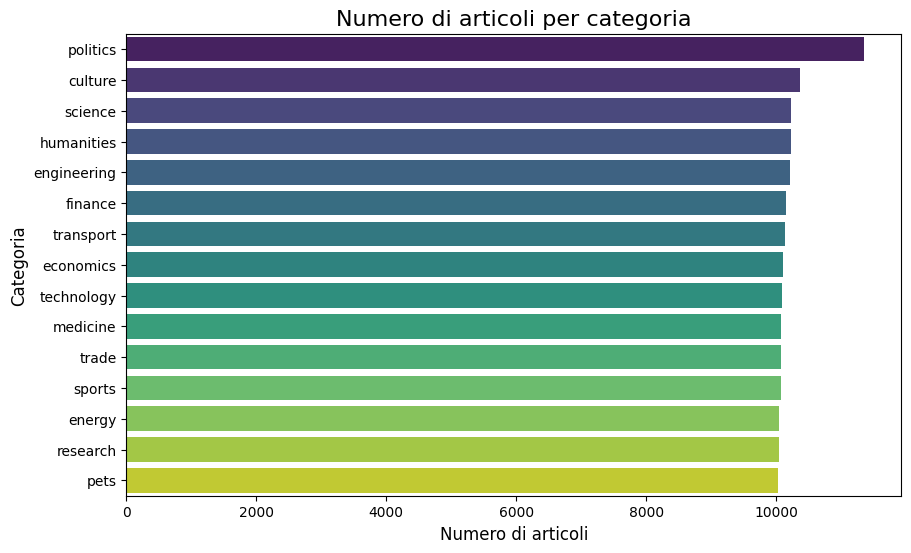


>>>>><  pulizia dei record con campo 'documents' nullo...
>>>Record totali prima della pulizia: 153232
>>>>>>Record totali dopo la pulizia: 152304
>>>>>>>> Record rimossi: 928
Pulizia andata a buon fine. Da ora in poi uso il dataframe pulito

>>>><<Analisi della lunghezza degli articoli per categoria:
+-----------+--------------+--------------+--------------+
|      label|Min Word Count|Max Word Count|Avg Word Count|
+-----------+--------------+--------------+--------------+
|    finance|             3|         33479|       1909.89|
|    science|            15|         29419|       1875.62|
|   politics|            11|         20140|       1515.65|
| humanities|             7|         23198|       1059.73|
|  economics|            10|         24022|         984.2|
| technology|             2|         18144|        889.23|
|   medicine|            12|         18422|        792.15|
|engineering|             8|         11856|        725.11|
|   research|            17|         27223|    

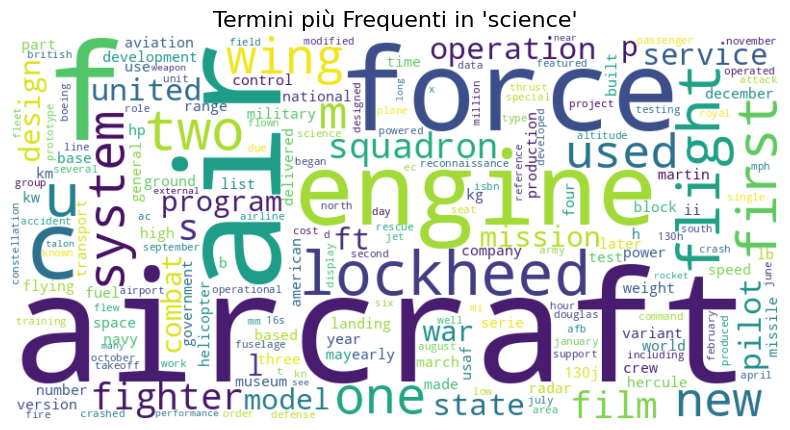


Generazione Word Cloud per la categoria: 'politics'


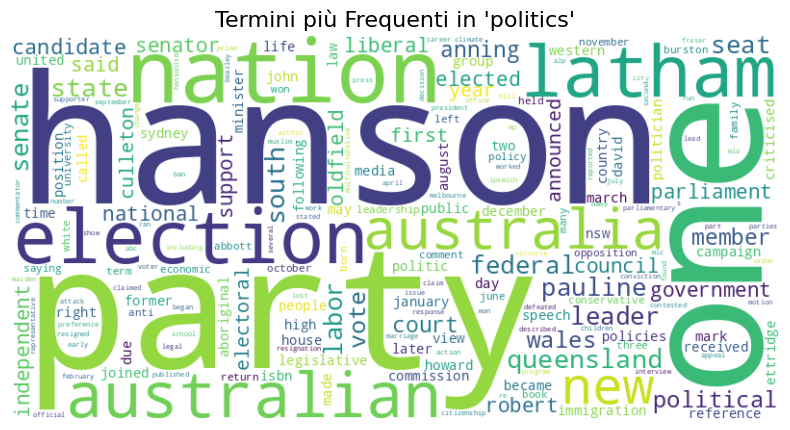


Generazione Word Cloud per la categoria: 'economics'


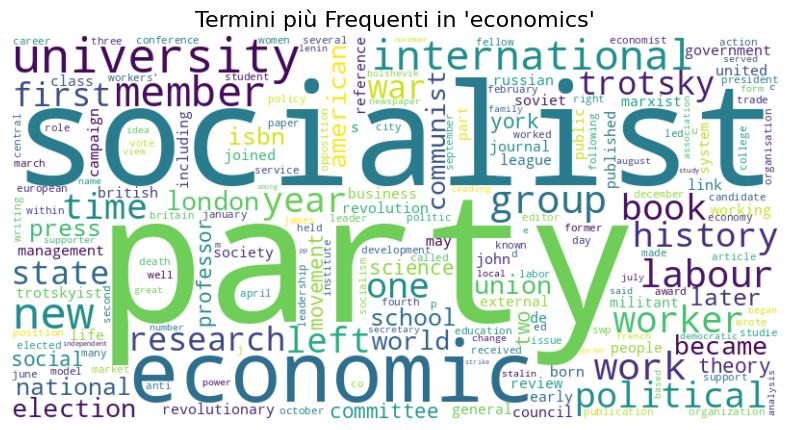

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################

# Classificatore

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


>>>>>>>Numero di record per l'addestramento: 121687
>>>>>>Numero di record per il test: 30617

>>>>>< addestramento della pipeline...
>>>>>Addestramento completato con successo!


# Valutazione del modello

In [ ]:
########################################################################
############### CENSORED CODE ##########################################
########### CONTACT ME FOR THE FULL VERSION OF THE NOTEBOOK ############
########################################################################


>>>>>>>>>>>>Valutazione del modello sul test set...
+---------+----------+-------------+
|    label|prediction|label_indexed|
+---------+----------+-------------+
|   energy|       8.0|          8.0|
| medicine|      12.0|         12.0|
| politics|       2.0|          0.0|
|    trade|      13.0|         13.0|
|  culture|       2.0|          3.0|
|transport|       1.0|          4.0|
|   energy|       1.0|          8.0|
|  finance|      14.0|         14.0|
|     pets|       9.0|          9.0|
| politics|       0.0|          0.0|
+---------+----------+-------------+
only showing top 10 rows


>>>>>Accuracy sul test set = 92.70%
>>>>>>>>>>F1-Score (pesato) sul test set = 92.70%


/content/spark-3.5.1-bin-hadoop3/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(



>>>>>><Matrice di confusione:
             politics  engineering  humanities  culture  transport  economics  \
politics       2236.0          4.0         6.0      1.0        0.0        1.0   
engineering       0.0       1805.0        11.0     10.0       25.0       10.0   
humanities        5.0         16.0      1866.0     11.0        2.0       16.0   
culture           2.0          5.0        15.0   1967.0        2.0        1.0   
transport         2.0         27.0         3.0      1.0     1932.0        0.0   
economics         1.0         15.0        19.0      3.0        0.0     1940.0   
science           3.0         24.0        10.0      2.0       23.0        4.0   
technology        0.0         13.0         8.0      3.0        2.0        9.0   
energy            5.0         12.0         2.0      1.0        6.0        2.0   
pets              0.0          7.0         3.0      1.0        0.0        1.0   
sports            1.0          8.0         1.0      6.0        1.0        1.0 

**Commento dei risultati**<br>
Osservando le metriche di performance, si nota subito che le classi 'research' e 'medicine' hanno un F1-Score significativamente più basso rispetto alle altre.
Inoltre, nella matrice di confusione, 316 articoli di 'research' sono stati erroneamente classificati come 'medicine' e, quasi lo stesso numero, 323 articoli di 'medicine', sono stati classificati come 'research'.<br>
Cosa significa? Questo non è un errore del modello, ma una scoperta sul dataset. Indica una forte sovrapposizione tematica e lessicale tra gli articoli delle due categorie. Molti articoli di ricerca medica utilizzano un vocabolario quasi identico a quello di articoli di medicina generale.<br>
<br>
<br>
<br>
La word cloud per 'economics' è sorprendente. Invece di termini come "market", "price", "supply", "demand", i termini più prominenti sono parole come "socialist" e "party".<br>
Questo suggerisce che il campione di articoli nella categoria 'economics' potrebbe essere sbilanciato verso la storia del pensiero economico-politico (es. Marxismo, Socialismo) piuttosto che verso la teoria economica moderna. Di conseguenza, il modello imparerà a classificare come "economics" testi che parlano di partiti socialisti. Questo è un potenziale bias nel dataset che hai indirettamente scoperto.